In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime

In [46]:
train_sales = pd.read_csv(r'../apple/Desktop/competitive-data-science-predict-future-sales/sales_train.csv')
test_sales = pd.read_csv(r'../apple/Desktop/competitive-data-science-predict-future-sales/test.csv')
train_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [84]:
train_sales['date'] = train_sales['date'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
train_sales.set_index('date', inplace=True)

In [102]:
train_sales['item_id']['2013']

date
2013-01-02    22154
2013-01-03     2574
2013-01-05     2574
2013-01-07     2574
2013-01-08     2574
              ...  
2013-12-06     5671
2013-12-01     5671
2013-12-26     5669
2013-12-25     5669
2013-12-19     5671
Name: item_id, Length: 286274, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a29c9a750>,
 'caps': [<matplotlib.lines.Line2D at 0x1a43d01890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29c9a810>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25cba210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25cdcd50>],
 'means': []}

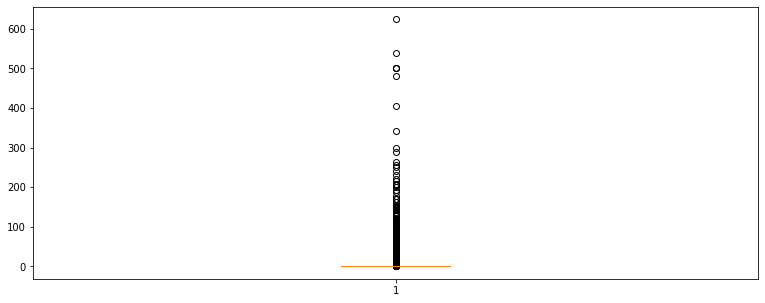

In [75]:
fig, axes = plt.subplots(figsize=(13,5))
axes.boxplot(train_sales['item_cnt_day'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a25b3ccd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a25b30750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a25b3c050>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25b3cd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25b256d0>],
 'means': []}

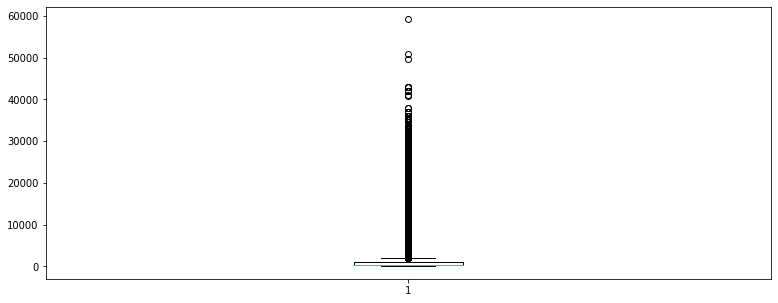

In [52]:
fig, axes = plt.subplots(figsize=(13,5))
axes.boxplot(train_sales['item_price'])

In [49]:
train_sales = train_sales.drop(train_sales[train_sales['item_cnt_day']>=1000].index)
train_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [50]:
train_sales = train_sales.drop(train_sales[train_sales['item_price']>=100000].index)
train_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [53]:
list(set(test_sales['item_id'].unique())-set(train_sales['item_id'].unique()))

[20486,
 6152,
 6153,
 6169,
 14383,
 20535,
 4156,
 10310,
 20560,
 20561,
 83,
 20577,
 16498,
 6259,
 20594,
 20599,
 20600,
 12409,
 18560,
 10372,
 140,
 8337,
 12441,
 8354,
 8355,
 168,
 173,
 12468,
 12469,
 12470,
 12471,
 14521,
 6335,
 18627,
 20677,
 20680,
 204,
 4310,
 16601,
 4318,
 237,
 10483,
 249,
 254,
 10507,
 2322,
 2323,
 2324,
 2325,
 2326,
 2327,
 2328,
 12568,
 20760,
 12574,
 16675,
 6439,
 302,
 12591,
 14647,
 14648,
 4412,
 20796,
 14662,
 8545,
 20836,
 8549,
 20837,
 8551,
 20843,
 20845,
 2420,
 6519,
 6520,
 6521,
 2426,
 2427,
 2428,
 6522,
 6523,
 6524,
 6525,
 6526,
 2434,
 6527,
 6528,
 6529,
 6530,
 6531,
 6532,
 6533,
 20878,
 20879,
 20880,
 402,
 14739,
 14760,
 16811,
 428,
 14765,
 430,
 16813,
 14784,
 454,
 480,
 18913,
 8676,
 14832,
 6645,
 10747,
 12802,
 20996,
 20863,
 2569,
 8722,
 10779,
 4642,
 18979,
 566,
 8760,
 6729,
 6730,
 6731,
 6732,
 6733,
 6734,
 16976,
 6742,
 6743,
 12890,
 19048,
 14959,
 8821,
 8822,
 8823,
 8824,
 882

In [54]:
train_sales = train_sales[(train_sales['shop_id'].isin(test_sales['shop_id'].unique())) & (train_sales['item_id'].isin(test_sales['item_id'].unique()))]
train_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
10,03.01.2013,0,25,2574,399.0,2.0
11,05.01.2013,0,25,2574,399.0,1.0
12,07.01.2013,0,25,2574,399.0,1.0
13,08.01.2013,0,25,2574,399.0,2.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0


In [103]:
test_sales

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [55]:
train_sales[train_sales['item_price']<0]
train_sales.loc[train_sales[train_sales['item_price']<0].index, 'item_price']=0
train_sales[train_sales['item_cnt_day']<0]
train_sales.loc[train_sales[train_sales['item_cnt_day']<=0].index, 'item_cnt_day']=0

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [56]:
train_sales['revenue'] = train_sales['item_price']*train_sales['item_cnt_day']
train_sales

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,02.01.2013,0,59,22154,999.0,1.0,999.0
10,03.01.2013,0,25,2574,399.0,2.0,798.0
11,05.01.2013,0,25,2574,399.0,1.0,399.0
12,07.01.2013,0,25,2574,399.0,1.0,399.0
13,08.01.2013,0,25,2574,399.0,2.0,798.0
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.0,1.0,299.0
2935845,09.10.2015,33,25,7460,299.0,1.0,299.0
2935846,14.10.2015,33,25,7459,349.0,1.0,349.0
2935847,22.10.2015,33,25,7440,299.0,1.0,299.0


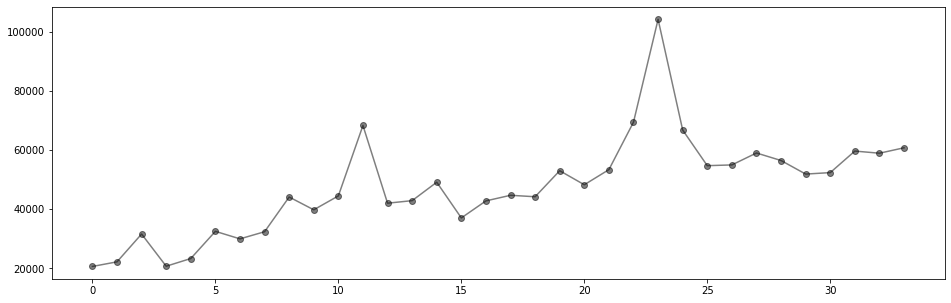

In [57]:
idx = train_sales.groupby('date_block_num')['item_cnt_day'].sum().index
fig =  plt.figure(figsize=(16,5))
plt.plot(idx, train_sales.groupby('date_block_num')['item_cnt_day'].sum(), color = 'black', alpha=0.5, marker='o')

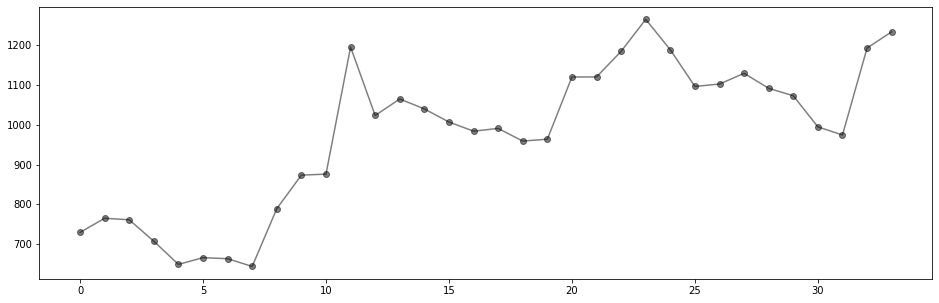

In [58]:
idx = train_sales.groupby(['date_block_num'])['item_price'].mean()[0:50].index
fig = plt.figure(figsize=(16,5))
plt.plot(idx, train_sales.groupby(['date_block_num'])['item_price'].mean(), color='black', alpha=0.5, marker='o')

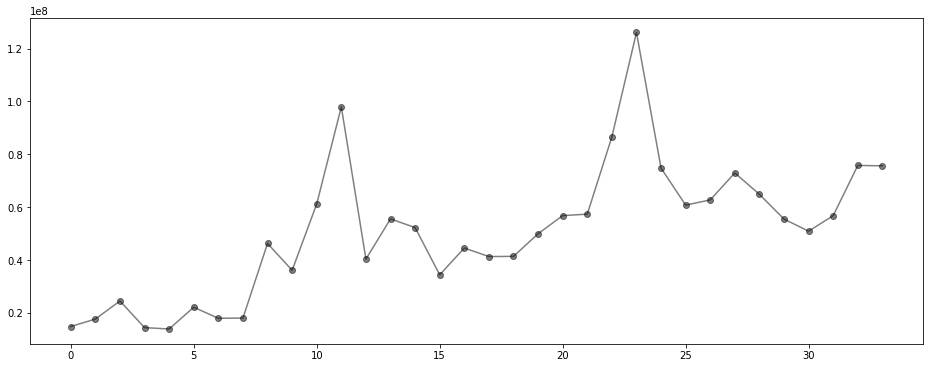

In [59]:
idx = train_sales.groupby('date_block_num')['revenue'].sum().index
fig =  plt.figure(figsize=(16,6))
plt.plot(idx, train_sales.groupby('date_block_num')['revenue'].sum(), color = 'black', alpha=0.5, marker='o')

In [60]:
train_sales.groupby('date_block_num')['revenue'].sum()

date_block_num
0     1.482072e+07
1     1.765604e+07
2     2.448425e+07
3     1.440124e+07
4     1.389652e+07
5     2.212670e+07
6     1.793469e+07
7     1.802818e+07
8     4.625933e+07
9     3.608765e+07
10    6.122240e+07
11    9.794457e+07
12    4.033224e+07
13    5.555443e+07
14    5.225934e+07
15    3.437980e+07
16    4.452423e+07
17    4.129913e+07
18    4.137548e+07
19    4.992158e+07
20    5.680329e+07
21    5.733664e+07
22    8.657330e+07
23    1.260919e+08
24    7.475539e+07
25    6.075726e+07
26    6.273800e+07
27    7.294650e+07
28    6.482913e+07
29    5.547332e+07
30    5.090217e+07
31    5.678884e+07
32    7.578180e+07
33    7.563507e+07
Name: revenue, dtype: float64

In [61]:
train_sales[train_sales['date_block_num']==11]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
1124317,15.12.2013,11,25,18016,500.0,1.0,500.0
1124323,31.12.2013,11,25,18016,500.0,1.0,500.0
1124330,09.12.2013,11,25,17785,149.0,1.0,149.0
1124337,04.12.2013,11,25,17785,149.0,1.0,149.0
1124356,18.12.2013,11,25,17481,999.0,1.0,999.0
...,...,...,...,...,...,...,...
1267557,06.12.2013,11,46,5671,2690.0,1.0,2690.0
1267558,01.12.2013,11,46,5671,2590.0,3.0,7770.0
1267559,26.12.2013,11,46,5669,2690.0,2.0,5380.0
1267560,25.12.2013,11,46,5669,2690.0,1.0,2690.0


In [62]:
train_sales[train_sales['date_block_num']==23]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
2192637,24.12.2014,23,42,17279,299.0,1.0,299.0
2192643,22.12.2014,23,42,17302,149.0,2.0,298.0
2192644,24.12.2014,23,42,17302,149.0,2.0,298.0
2192645,18.12.2014,23,42,17302,149.0,1.0,149.0
2192646,16.12.2014,23,42,17302,149.0,1.0,149.0
...,...,...,...,...,...,...,...
2323417,06.12.2014,23,25,5037,2599.0,1.0,2599.0
2323418,11.12.2014,23,25,5037,2599.0,1.0,2599.0
2323419,28.12.2014,23,25,5037,1999.0,2.0,3998.0
2323420,03.12.2014,23,25,5038,2999.0,1.0,2999.0


In [63]:
num_df = pd.DataFrame(train_sales.groupby(['shop_id','date_block_num'])['item_cnt_day'].sum().reset_index())
num_df

,shop_id,date_block_num,item_cnt_day
0,2,0,250.0
1,2,1,136.0
2,2,2,237.0
3,2,3,169.0
4,2,4,159.0
...,...,...,...
1322,59,29,807.0
1323,59,30,890.0
1324,59,31,1165.0
1325,59,32,858.0


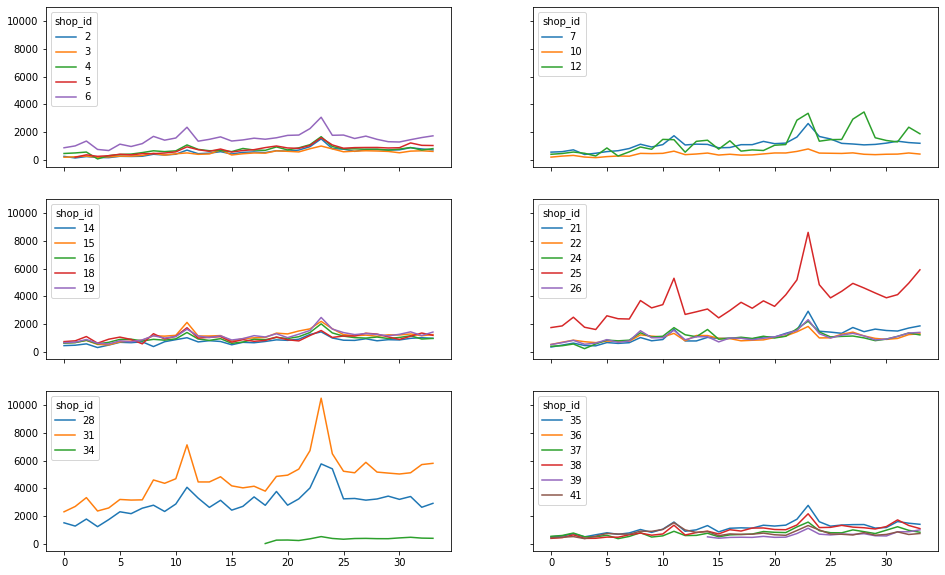

In [64]:
id_per_graph = 7
count=0
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(16,10))
for value1 in range(3):
    for value2 in range(2):
        for i in num_df[np.logical_and(count*id_per_graph <= num_df['shop_id'], num_df['shop_id'] < (count+1)*id_per_graph)]['shop_id'].unique():
            axes[value1,value2].plot('date_block_num', 'item_cnt_day', data=num_df[num_df['shop_id']==i], label=i)
            axes[value1,value2].legend(title='shop_id', loc='upper left')
        count+=1

In [65]:
mean_df = pd.DataFrame(train_sales.groupby(['shop_id','date_block_num'])['item_price'].mean().reset_index())
mean_df

,shop_id,date_block_num,item_price
0,2,0,889.576232
1,2,1,1172.886935
2,2,2,1014.684111
3,2,3,985.321818
4,2,4,879.411184
...,...,...,...
1322,59,29,930.888327
1323,59,30,905.788227
1324,59,31,816.249986
1325,59,32,1140.968309


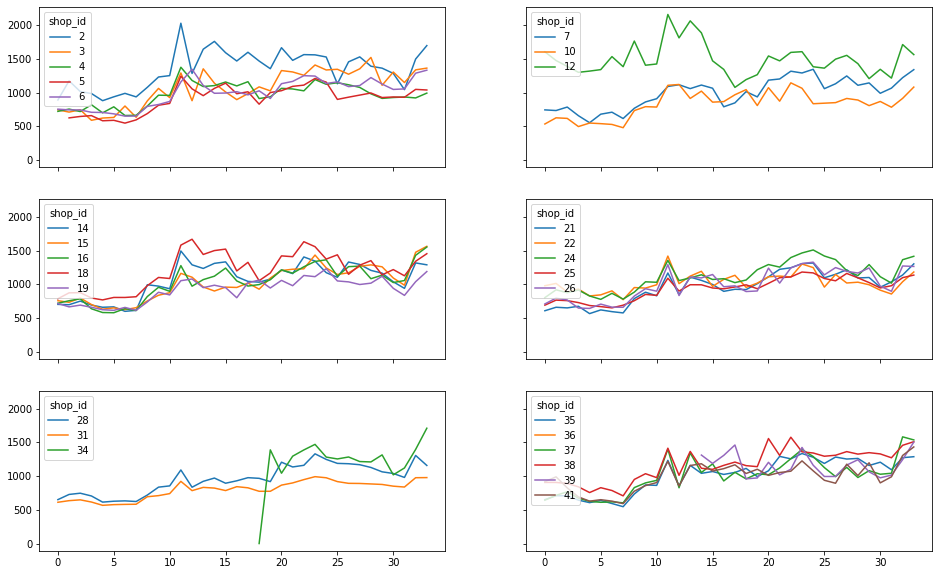

In [70]:
id_num = 7
count=0
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True ,figsize=(16,10))
for value1 in range(3):
    for value2 in range(2):
        for i in mean_df[np.logical_and(count*id_num <= mean_df['shop_id'], mean_df['shop_id'] < (count+1)*id_num)]['shop_id'].unique():
            axes[value1,value2].plot('date_block_num', 'item_price', data=mean_df[mean_df['shop_id']==i], label=i)
            axes[value1,value2].legend(title='shop_id', loc='upper left')
        count+=1

In [68]:
revenue_df = pd.DataFrame(train_sales.groupby(['shop_id','date_block_num'])['revenue'].mean().reset_index())
revenue_df

,shop_id,date_block_num,revenue
0,2,0,959.917348
1,2,1,1263.931290
2,2,2,1123.203762
3,2,3,992.455152
4,2,4,921.832237
...,...,...,...
1322,59,29,1031.881667
1323,59,30,966.761736
1324,59,31,1007.178765
1325,59,32,1412.061308


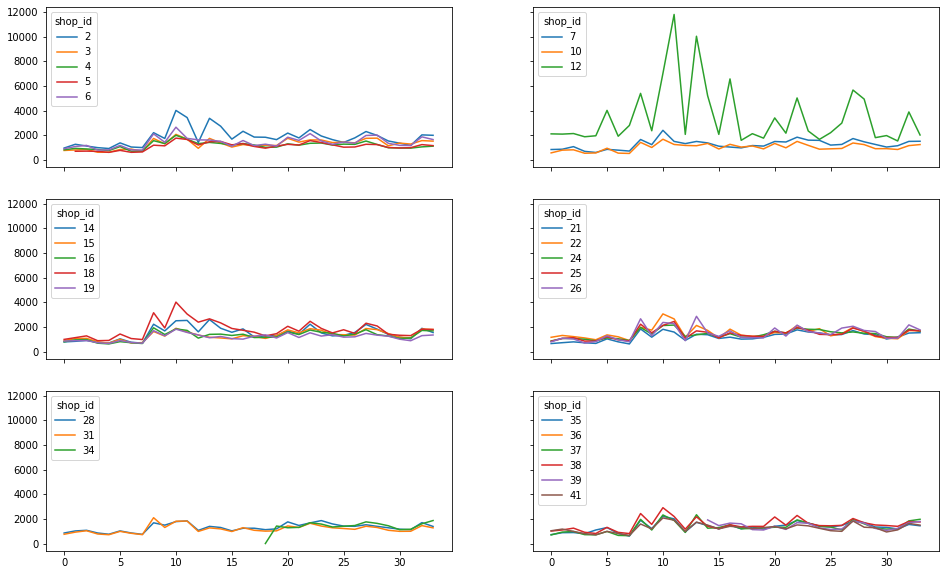

In [71]:
id_num = 7
count=0
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True,figsize=(16,10))
for value1 in range(3):
    for value2 in range(2):
        for i in revenue_df[np.logical_and(count*id_num <= revenue_df['shop_id'], revenue_df['shop_id'] < (count+1)*id_num)]['shop_id'].unique():
            axes[value1,value2].plot('date_block_num', 'revenue', data=revenue_df[revenue_df['shop_id']==i], label=i)
            axes[value1,value2].legend(title='shop_id', loc='upper left')
        count+=1